In [47]:
# LIBRARIES
library(tidyverse)
library(magrittr) ## for pipe operators
library(pwr) ## for power function and ES.h (Cohen's h)
library(scales) ## for scaling functions for ggplot2
library(gridExtra) # two plots next to each other
library(lsr) ## for Cohen's D
library(grid)
options(repr.plot.width  = 8,
        repr.plot.height = 6)

In [21]:
## DATA
cah <- read_csv("201806-CAH_PulseOfTheNation_Raw.csv")
## variable names currently full questions - need to rename
new_names <- c("gender", "age", "agerange", "race", "income", "educ", "partyid", "polaffil", 
               "trump", "hollymoney", "fed_min_is", "fed_min_should", "fed_tax_is", "fed_tax_should", 
               "redist", "redist_you", "redist_people", "baseincome", "faircomp", "ceofair", "attractive")
colnames(cah) <- new_names
glimpse(cah)

Parsed with column specification:
cols(
  .default = col_character(),
  `What is your age?` = col_double(),
  `About how much money do you make per year?` = col_double(),
  `If you had to guess, in dollars per hour, what do you think the federal minimum wage is?` = col_double(),
  `And in your opinion, in dollars per hour, what do you believe the federal minimum wage should be?` = col_double(),
  `If you had to guess, in percentage, what do you believe the federal tax rate is for individuals making more than 500 thousand dollars per year?` = col_double(),
  `And in your opinion, in percentage, what do you believe the federal tax rate should be for these individuals?` = col_double()
)

See spec(...) for full column specifications.



Observations: 800
Variables: 21
$ gender         <chr> "Female", "Male", "Female", "Male", "Male", "Female"...
$ age            <dbl> 70, 72, 82, 70, 65, 53, 63, 64, 64, 60, 66, 55, 89, ...
$ agerange       <chr> "65+", "65+", "65+", "65+", "65+", "45-54", "55-64",...
$ race           <chr> "Black", "White", "Black", "Asian", "Black", "White"...
$ income         <dbl> 20000, 56000, NA, NA, 60000, NA, 10000, 68000, 50000...
$ educ           <chr> "High school or less", "College degree", "College de...
$ partyid        <chr> "Independent", "Independent", "Democrat", "Independe...
$ polaffil       <chr> "Liberal", "Moderate", "Liberal", "Moderate", "Conse...
$ trump          <chr> "Strongly Disapprove", "Strongly Approve", "Strongly...
$ hollymoney     <chr> "DK/REF", "Fair", "Fair", "DK/REF", "Fair", "DK/REF"...
$ fed_min_is     <dbl> 15.0, 12.0, 8.5, NA, 14.0, 8.0, 8.0, 15.0, 7.5, 15.0...
$ fed_min_should <dbl> 15.0, 50.0, 15.0, NA, 14.0, 20.0, 10.0, 14.0, 10.0, ...
$ fed_tax_is     <db

In [11]:
summary(cah$fed_min_is)
sum(cah$fed_min_is > 40, na.rm = TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    8.00   10.00   11.98   12.00 1000.00      82 

[1] 4

In [14]:
cah1 <- cah %>% drop_na(fed_min_is) %>% filter(fed_min_is < 40)
summary(cah1$fed_min_is)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   10.00   10.25   12.00   35.00 

In [16]:
# t.test(x, # x is the vector of sample data
       # alternative = c("two.sided", "less", "greater"), # pick one alternative hypothesis
       # mu = 0) # set mu to the null hypothesis mean

t.test(cah1$fed_min_is, mu = 7.25, alternative = "greater")


	One Sample t-test

data:  cah1$fed_min_is
t = 22.923, df = 711, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 7.25
95 percent confidence interval:
 10.03711      Inf
sample estimates:
mean of x 
 10.25287 


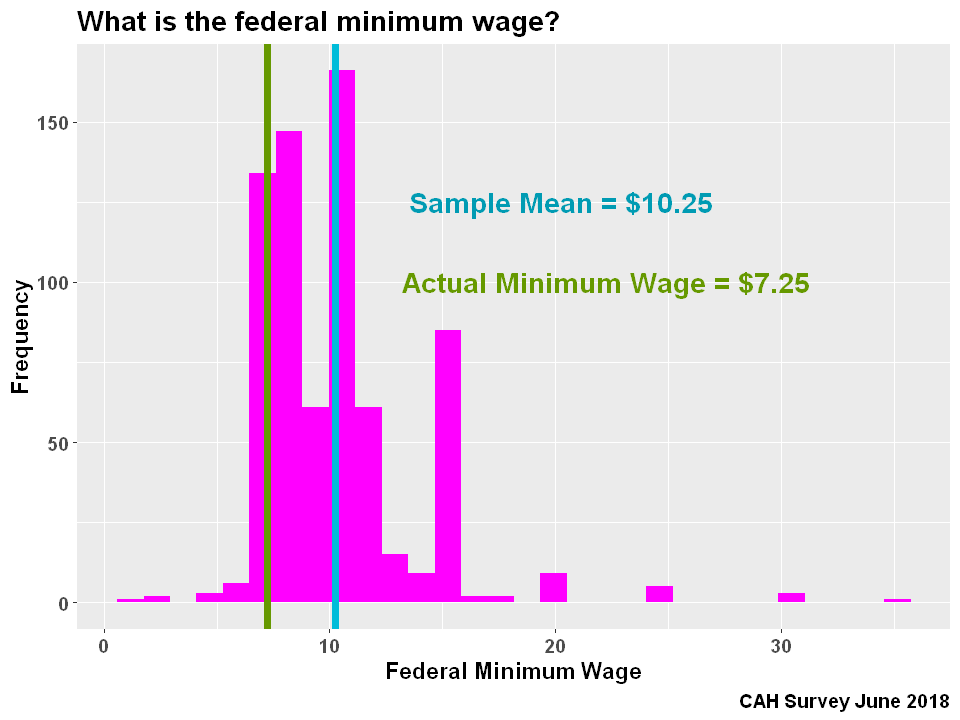

In [38]:
bold.14.text <- element_text(face = "bold", size = 14)
## s1 is the minimum requirement for a PQ plot of histogram of one sample distribution
s1 <- cah1 %>% ggplot(aes(x = fed_min_is)) +
                geom_histogram(bins = 30, fill = "magenta") +
      labs(x = "Federal Minimum Wage", y = "Frequency",
           title = "What is the federal minimum wage?",
           caption = "CAH Survey June 2018") +
      theme(text = bold.14.text)
# we can add a line and annotation to show sample mean
s2 <- s1 + geom_vline(xintercept = mean(cah1$fed_min_is), color = "#00bcd9", size = 2) +
           annotate(geom="text", x=mean(cah1$fed_min_is)+10, y=125, 
                    label=paste0("Sample Mean = ", dollar(mean(cah1$fed_min_is))),
                    color = "#009bb3", size = 6, fontface = 2) 
# we can also add a line and annotation to show population/null hypothesis mean
s3 <- s2 + geom_vline(xintercept = 7.25, color = "#669900", size = 2) +
           annotate(geom="text", x=7.25+15, y=100, 
                   label="Actual Minimum Wage = $7.25",
                   color = "#669900", size = 6, fontface = 2) 
t1 <- textGrob(expression("Concentration of " * phantom(bold("affluence")) * "and" * phantom(bold("poverty")) * " nationwide"),
                 x = 0.5, y = 1.1, gp = gpar(col = "black"))

t2 <- textGrob(expression(phantom("Concentration of ") * bold("affluence") * phantom(" and poverty nationwide")),
                 x = 0.5, y = 1.1, gp = gpar(col = "#EEB422"))

t3 <- textGrob(expression(phantom("Concentration of affluence and ") * bold("poverty") * phantom(" nationwide")),
                 x = 0.5, y = 1.1, gp = gpar(col = "#238E68"))s3

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."


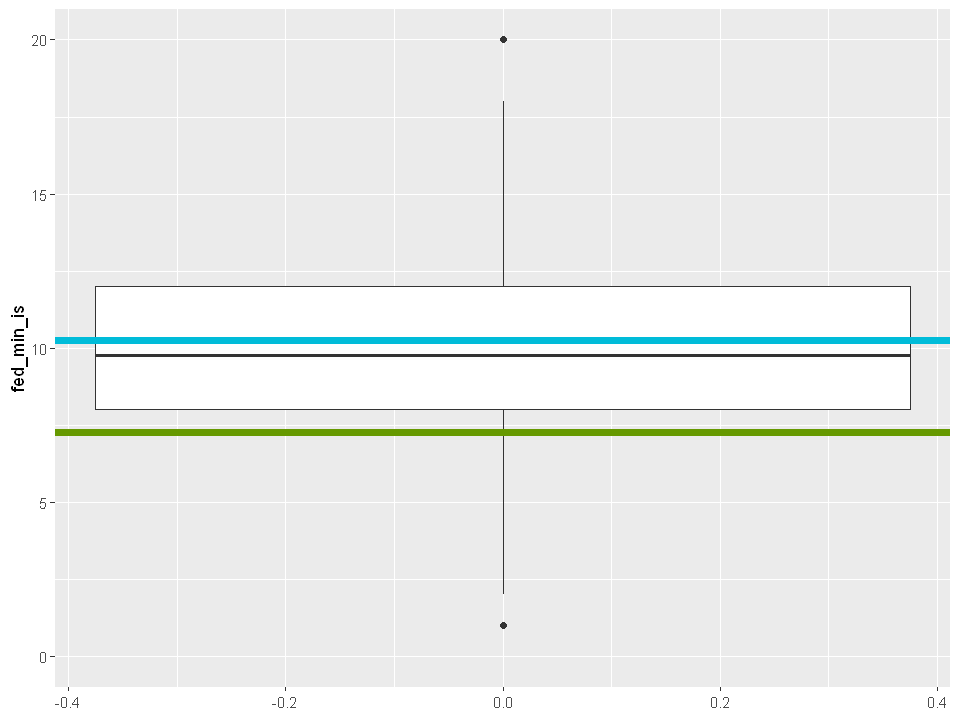

In [50]:
t1 <- textGrob(expression("Boxplot of guessed federal minimum wage with " * phantom(bold("sample mean")) * "and" * phantom(bold("population value"))),
                 x = 0.5, y = 1.1, gp = gpar(col = "black"))

t2 <- textGrob(expression(phantom("Boxplot of guessed federal minimum wage with ") * bold("sample mean") * phantom(" and population value")),
                 x = 0.5, y = 1.1, gp = gpar(col = "#00bcd9"))

t3 <- textGrob(expression(phantom("Boxplot of guessed federal minimum wage with sample mean and") * bold("population value")),
                 x = 0.5, y = 1.1, gp = gpar(col = "#669900"))

p <- cah1 %>% ggplot(aes(y = fed_min_is)) +
            geom_boxplot() +
            ylim(0,20) +
            geom_hline(yintercept = 7.25, color = "#669900", size = 2) +
            geom_hline(yintercept = mean(cah1$fed_min_is), color = "#00bcd9", size = 2) +
            annotation_custom(grobTree(t1, t2, t3))

g <- ggplot_gtable(ggplot_build(p))
g$layout$clip[g$layout$name == "panel"] <- "off"

# re-draw
grid.draw(g)

In [53]:
devtools::install_github("clauswilke/ggtext")

ggplot2     (3.2.1     -> 8bc39f285...) [GitHub]
gridtext    (NA        -> 0.1.1       ) [CRAN]
rlang       (0.4.2     -> 0.4.5       ) [CRAN]
stringi     (NA        -> 1.4.6       ) [CRAN]
farver      (2.0.1     -> 2.0.3       ) [CRAN]
cli         (2.0.1     -> 2.0.2       ) [CRAN]
fansi       (0.4.0     -> 0.4.1       ) [CRAN]
vctrs       (0.2.1     -> 0.2.3       ) [CRAN]
digest      (0.6.23    -> 0.6.25      ) [CRAN]
xfun        (0.11      -> 0.12        ) [CRAN]
mime        (0.8       -> 0.9         ) [CRAN]
rstudioapi  (0.10      -> 0.11        ) [CRAN]
callr       (3.4.0     -> 3.4.2       ) [CRAN]
prettyunits (1.1.0     -> 1.1.1       ) [CRAN]
processx    (3.4.1     -> 3.4.2       ) [CRAN]
ps          (1.3.0     -> 1.3.2       ) [CRAN]
RCurl       (1.95-4.12 -> 1.98-1.1    ) [CRAN]
testthat    (2.3.1     -> 2.3.2       ) [CRAN]


Installing 17 packages: gridtext, rlang, stringi, farver, cli, fansi, vctrs, digest, xfun, mime, rstudioapi, callr, prettyunits, processx, ps, RCurl, testthat



ERROR: Error: Failed to install 'ggtext' from GitHub:
  (converted from warning) incomplete final line found on 'C:\Users\Adrianne\Documents\.Rprofile'
